# Kings County Housing Prices Bakeoff

Below are a list of steps that you should take while trying to complete your bake-off entry.

## Step 1: Read in Data

In [70]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import math 

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [71]:
#Loading test and train datasets
df2 = pd.read_csv('kc_house_data_test_features.csv', index_col=0)
df1 = pd.read_csv('kc_house_data_train.csv', index_col=0)

## Step 2: Exploratory Data Analysis 
    
Become familiar with the data.  Look to see if there are any extreme values.  

Additionally create data visualizations to determine if there are any relationships between your features and your target variables. 

In [3]:
df1.shape

(17290, 21)

In [4]:
df_unkown.shape

(4323, 20)

In [5]:
df1.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
df2.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17290 entries, 0 to 17289
Data columns (total 21 columns):
id               17290 non-null int64
date             17290 non-null object
price            17290 non-null float64
bedrooms         17290 non-null int64
bathrooms        17290 non-null float64
sqft_living      17290 non-null int64
sqft_lot         17290 non-null int64
floors           17290 non-null float64
waterfront       17290 non-null int64
view             17290 non-null int64
condition        17290 non-null int64
grade            17290 non-null int64
sqft_above       17290 non-null int64
sqft_basement    17290 non-null int64
yr_built         17290 non-null int64
yr_renovated     17290 non-null int64
zipcode          17290 non-null int64
lat              17290 non-null float64
long             17290 non-null float64
sqft_living15    17290 non-null int64
sqft_lot15       17290 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 2.9+ MB


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4323 entries, 0 to 4322
Data columns (total 20 columns):
id               4323 non-null int64
date             4323 non-null object
bedrooms         4323 non-null int64
bathrooms        4323 non-null float64
sqft_living      4323 non-null int64
sqft_lot         4323 non-null int64
floors           4323 non-null float64
waterfront       4323 non-null int64
view             4323 non-null int64
condition        4323 non-null int64
grade            4323 non-null int64
sqft_above       4323 non-null int64
sqft_basement    4323 non-null int64
yr_built         4323 non-null int64
yr_renovated     4323 non-null int64
zipcode          4323 non-null int64
lat              4323 non-null float64
long             4323 non-null float64
sqft_living15    4323 non-null int64
sqft_lot15       4323 non-null int64
dtypes: float64(4), int64(15), object(1)
memory usage: 709.2+ KB


In [77]:
pd.set_option('display.max_columns', None)
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [10]:
df2.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1974300020,20140827T000000,4,2.50,2270,11500,1.0,0,0,3,8,1540,730,1967,0,98034,47.7089,-122.241,2020,10918
1,1974300020,20150218T000000,4,2.50,2270,11500,1.0,0,0,3,8,1540,730,1967,0,98034,47.7089,-122.241,2020,10918
2,3630020380,20141107T000000,3,2.50,1470,1779,2.0,0,0,3,8,1160,310,2005,0,98029,47.5472,-121.998,1470,1576
3,1771000290,20141203T000000,3,1.75,1280,16200,1.0,0,0,3,8,1030,250,1976,0,98077,47.7427,-122.071,1160,10565
4,5126310470,20150115T000000,4,2.75,2830,8126,2.0,0,0,3,8,2830,0,2005,0,98059,47.4863,-122.140,2830,7916


In [12]:
df1.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,4565501756.436553,540739.548641,3.372470,2.111943,2081.464604,15243.399884,1.490312,0.007981,0.238519,3.408502,7.654425,1789.306015,292.158589,1970.792019,83.806304,98078.193175,47.560058,-122.214258,1987.986698,12873.475824
std,2874655595.362363,373318.978749,0.939346,0.770476,920.018539,42304.623788,0.538909,0.088985,0.775229,0.651296,1.174718,829.265107,443.151874,29.343516,400.329376,53.607949,0.138412,0.140857,684.802635,27227.437583
min,1000102.000000,75000.000000,0.000000,0.000000,290.000000,572.000000,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,2114700558.750000,321000.000000,3.000000,1.500000,1430.000000,5081.250000,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.329000,1490.000000,5111.250000
50%,3903650042.500000,450000.000000,3.000000,2.250000,1920.000000,7642.000000,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7622.500000
75%,7301150051.500000,645000.000000,4.000000,2.500000,2550.000000,10725.750000,2.000000,0.000000,0.000000,4.000000,8.000000,2214.500000,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000,10101.750000
max,9900000190.000000,7700000.000000,33.000000,8.000000,13540.000000,1651359.000000,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000


* bedrooms: the min is 0. This will have to be looked into
* bedrooms: the max is 33. Could this really be? maybe look at the sqft living for that row with 33 
* bathrooms: the min is 0. This will also have to be looked into


In [13]:
df2.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000
mean,4625408959.804996,3.387231,2.322056,2183.344899,12750.177423,1.738723,0.006477,0.201249,3.248439,7.904696,1936.424474,246.920426,1985.545686,64.198705,98077.777932,47.560232,-122.209611,2031.962757,10789.035855
std,2920358721.688492,0.906016,0.782063,966.768796,40639.425496,0.586193,0.080228,0.711334,0.554978,1.167461,895.247498,408.555950,30.572267,352.271856,50.974730,0.133668,0.147649,727.968964,27415.348930
min,3600072.000000,0.000000,0.000000,290.000000,635.000000,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.185300,-122.505000,620.000000,651.000000
25%,2125734752.000000,3.000000,1.750000,1452.000000,3800.500000,1.000000,0.000000,0.000000,3.000000,7.000000,1248.000000,0.000000,1964.000000,0.000000,98033.000000,47.487400,-122.334000,1480.000000,4000.000000
50%,3834000820.000000,3.000000,2.500000,2000.000000,6000.000000,2.000000,0.000000,0.000000,3.000000,8.000000,1690.000000,0.000000,2002.000000,0.000000,98065.000000,47.567400,-122.230000,1870.000000,6000.000000
75%,7504000830.000000,4.000000,2.500000,2730.000000,9156.000000,2.000000,0.000000,0.000000,3.000000,9.000000,2520.000000,418.500000,2009.000000,0.000000,98117.000000,47.673450,-122.115000,2460.000000,9000.000000
max,9895000040.000000,10.000000,6.500000,8020.000000,1164794.000000,3.500000,1.000000,4.000000,5.000000,13.000000,8020.000000,2810.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.364000,6210.000000,858132.000000


* Look at Coefficient of Variation in the variables.
* bedrooms: the min is 0. This will have to be looked into
* bathrooms: the min is 0. This will also have to be looked into
* floors: max of 3.5. The .5 floor needs to be looked into

In [30]:
df1.nunique(axis=0)

id               17176
date               371
price             3534
bedrooms            13
bathrooms           30
sqft_living        947
sqft_lot          8428
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         867
sqft_basement      290
yr_built           116
yr_renovated        69
zipcode             70
lat               4837
long               733
sqft_living15      714
sqft_lot15        7582
dtype: int64

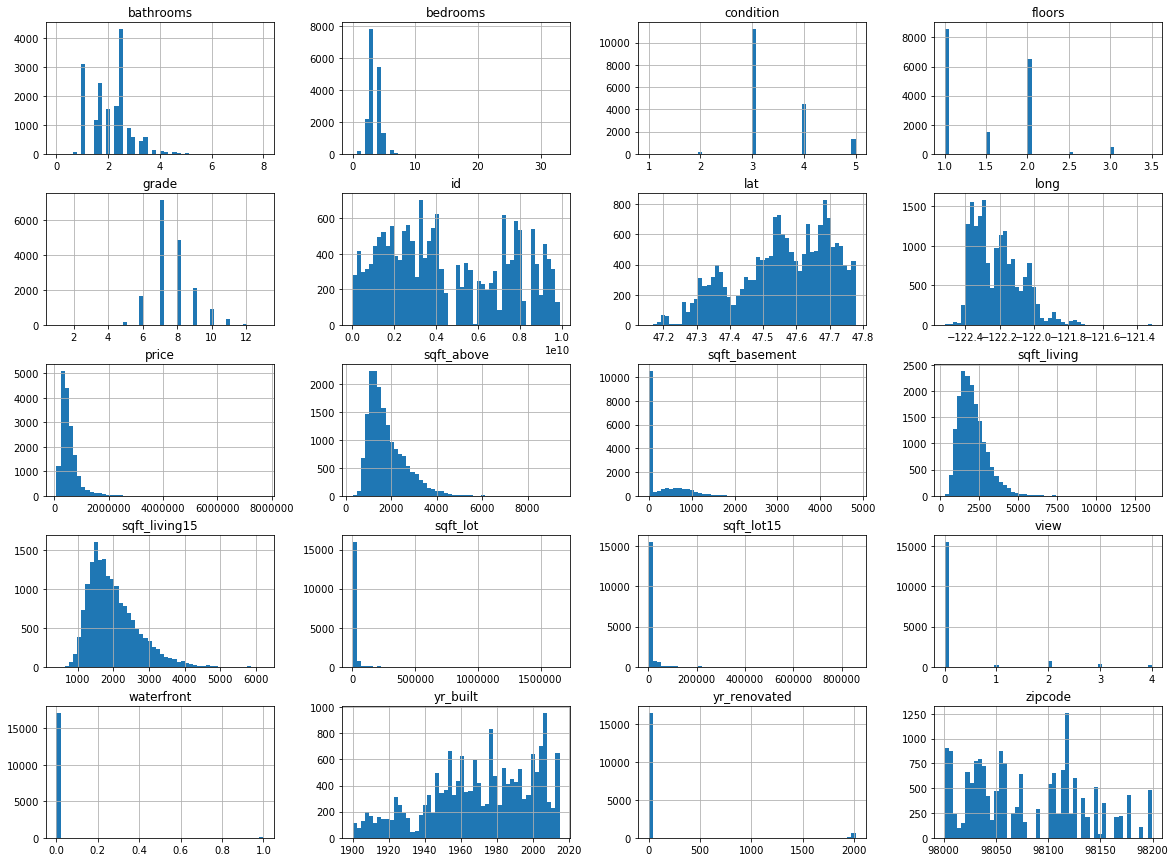

In [4]:
df1.hist(bins=50, figsize=(20,15))
plt.show()

In [5]:
df1.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.015644,-0.001529,0.003833,-0.014251,-0.129837,0.017126,0.000101,0.012594,-0.014272,0.003163,-0.013932,-0.003516,0.013697,-0.019560,-0.008166,-0.001865,0.017388,-0.007494,-0.139605
price,-0.015644,1.000000,0.305106,0.524335,0.703540,0.086803,0.256985,0.275779,0.395485,0.036099,0.666215,0.607760,0.323312,0.056450,0.117770,-0.048958,0.302394,0.019327,0.585567,0.081423
bedrooms,-0.001529,0.305106,1.000000,0.507867,0.570428,0.029375,0.172975,-0.008581,0.079741,0.025266,0.354679,0.472492,0.300085,0.153769,0.013679,-0.147515,-0.002170,0.124279,0.387589,0.026665
bathrooms,0.003833,0.524335,0.507867,1.000000,0.755270,0.085470,0.497967,0.065848,0.188817,-0.122976,0.664191,0.686853,0.282700,0.507761,0.048140,-0.201527,0.023074,0.221308,0.568080,0.086499
sqft_living,-0.014251,0.703540,0.570428,0.755270,1.000000,0.166810,0.357169,0.109738,0.283336,-0.061530,0.762929,0.876696,0.435529,0.319397,0.051448,-0.195893,0.052646,0.234453,0.755066,0.179570
sqft_lot,-0.129837,0.086803,0.029375,0.085470,0.166810,1.000000,-0.002205,0.015356,0.073058,-0.013715,0.110320,0.180755,0.008065,0.054228,0.004520,-0.126590,-0.082029,0.226190,0.136959,0.701875
floors,0.017126,0.256985,0.172975,0.497967,0.357169,-0.002205,1.000000,0.025132,0.025883,-0.259230,0.458984,0.528509,-0.247481,0.483657,0.005985,-0.060560,0.048227,0.128795,0.283933,-0.008170
waterfront,0.000101,0.275779,-0.008581,0.065848,0.109738,0.015356,0.025132,1.000000,0.407565,0.009608,0.092234,0.077162,0.083433,-0.021981,0.094268,0.034282,-0.013331,-0.042728,0.091090,0.026895
view,0.012594,0.395485,0.079741,0.188817,0.283336,0.073058,0.025883,0.407565,1.000000,0.045060,0.249554,0.164747,0.279939,-0.049593,0.091291,0.089475,0.003820,-0.077572,0.279999,0.073185
condition,-0.014272,0.036099,0.025266,-0.122976,-0.061530,-0.013715,-0.259230,0.009608,0.045060,1.000000,-0.142066,-0.157466,0.166923,-0.358921,-0.060969,0.007068,-0.009927,-0.109200,-0.094307,-0.007125


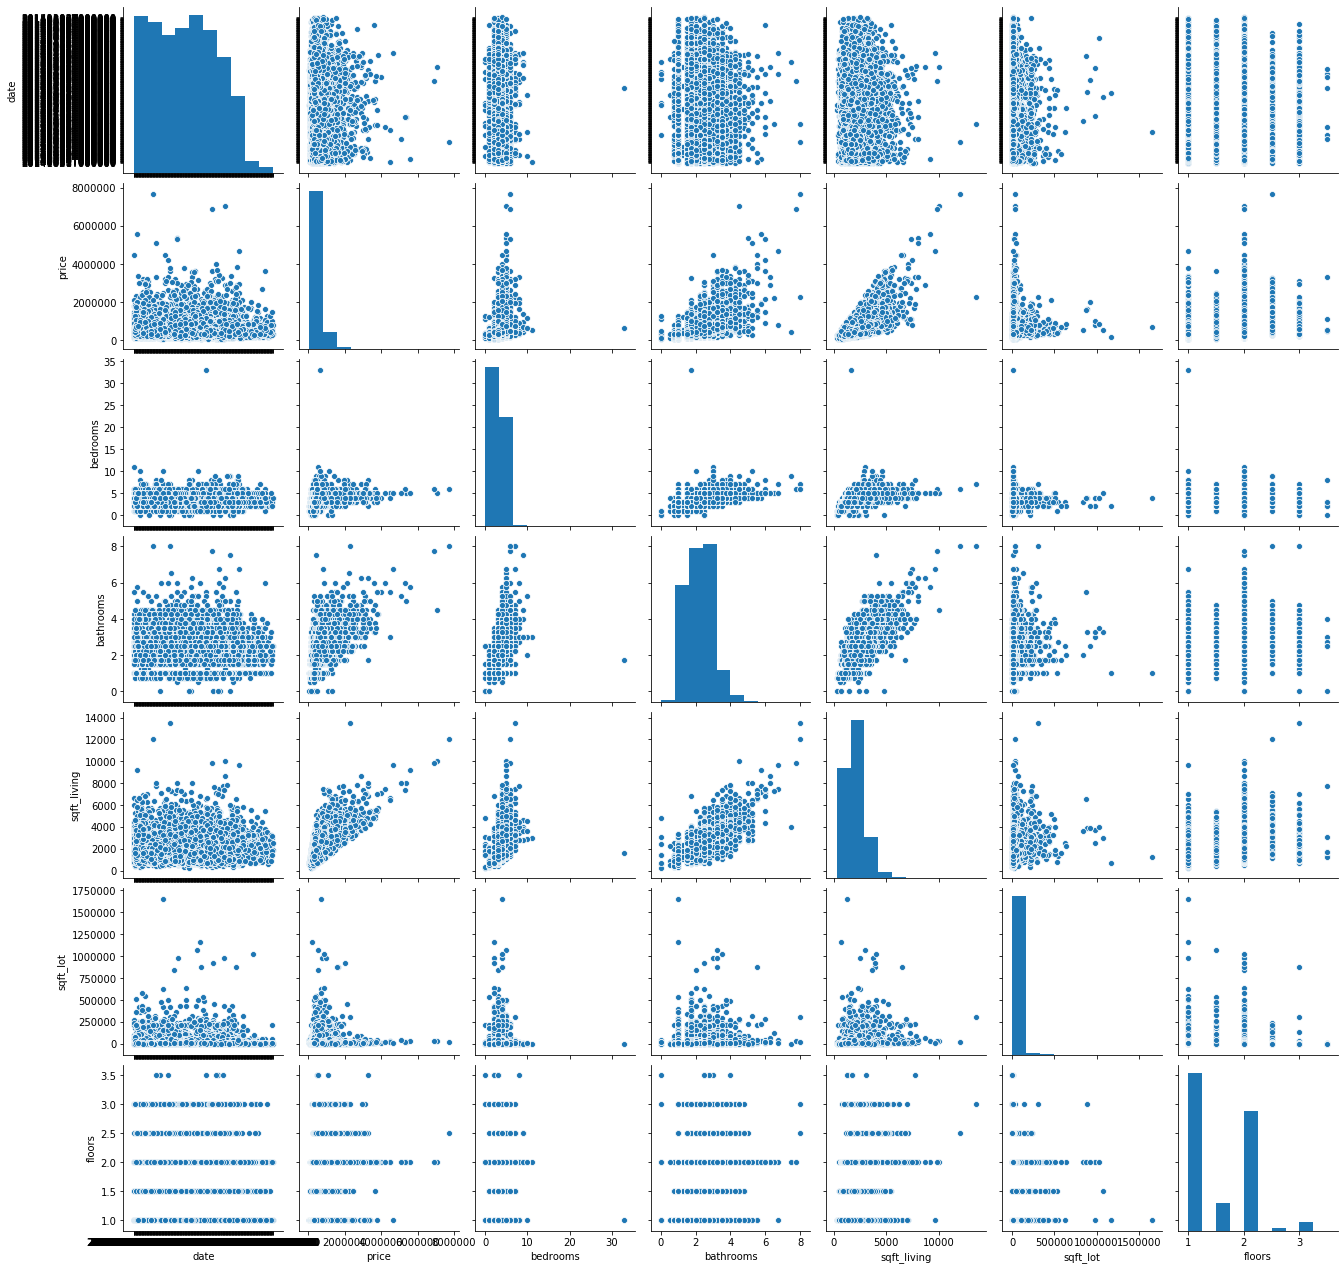

In [4]:
sns.pairplot(df1, vars=('date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors'))

In [6]:
df1['floors'].value_counts()
# Binning here rounding up the values?

1.0    8606
2.0    6538
1.5    1524
3.0     475
2.5     140
3.5       7
Name: floors, dtype: int64

In [7]:
df1['waterfront'].value_counts()

0    17152
1      138
Name: waterfront, dtype: int64

In [8]:
df1['view'].value_counts()

0    15571
2      775
3      410
4      270
1      264
Name: view, dtype: int64

In [9]:
df1['condition'].value_counts()

3    11244
4     4516
5     1367
2      139
1       24
Name: condition, dtype: int64

In [10]:
df1['grade'].value_counts()

7     7183
8     4848
9     2099
6     1648
10     893
11     319
5      192
12      72
4       22
13      11
3        2
1        1
Name: grade, dtype: int64

In [106]:
#examining VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

df1.dropna()

df_vif = df1._get_numeric_data() #to get only the numeric columns

predictors= df_vif.drop(columns=['id', "sqft_lot",'sqft_living', 'sqft_above', 'sqft_basement', "sqft_lot15", "yr_built", "yr_renovated"])

vif = pd.DataFrame()
vif['VIF'] = [format(variance_inflation_factor(predictors.values, i), '.2f') for i in range(predictors.shape[1])]
vif["features"] = predictors.columns

vif


,VIF,features
0,8.16,price
1,19.63,bedrooms
2,20.89,bathrooms
3,13.01,floors
4,1.28,waterfront
5,1.52,view
6,31.84,condition
7,139.10,grade
8,1409575.94,zipcode
9,149717.15,lat


## Step 3: Clean up any issues (extreme values, etc.) with the data.  

Remember that you can't just delete rows with extreme values. Similar observations might be present in the holdout data set, and you can't just delete those rows and not have a prediction for it. 

In [7]:
df_train.loc[(df_train['bathrooms'] == 0) | (df_train['bedrooms'] == 0)].shape
# there are 14 rows that are true to this condition. since no house can have 0
# bedrooms or 0 bathrooms, we will have to find a way to impute of remove.
#considering the large sample, removing the 14 rows may be a very small price to pay
# for missing values

(14, 21)

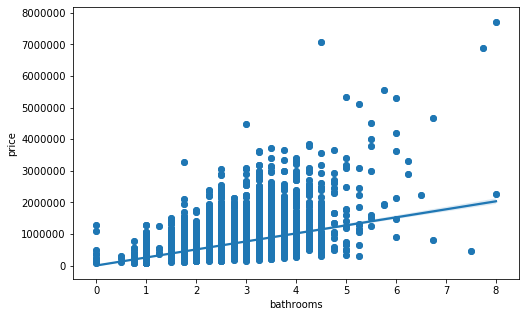

In [17]:
x1 = df1['bathrooms']
y1 = df1['price']
fig, ax = plt.subplots(figsize = (8,5))
ax.scatter(x1, y1)
sns.regplot(x1, y1)
# plt.hist(x1, y1)

In [18]:
mean1 = df1['bathrooms'].mean()

In [61]:
df1.loc[df1['bathrooms']== 0, 'bathrooms'] = df1['bathrooms'].mean()
df2.loc[df2['bathrooms']== 0, 'bathrooms'] = df2['bathrooms'].mean()

In [62]:
df1.loc[df_train['bathrooms']==0].shape

(0, 21)

In [63]:
df2.loc[df2['bathrooms']==0].shape

(0, 20)

In [30]:
df_1['bathrooms'].describe()

count    17290.000000
mean         2.112921
std          0.769135
min          0.500000
25%          1.500000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

In [64]:
df2['bathrooms'].describe()

count    4323.000000
mean        2.322594
std         0.781264
min         0.750000
25%         1.750000
50%         2.500000
75%         2.500000
max         6.500000
Name: bathrooms, dtype: float64

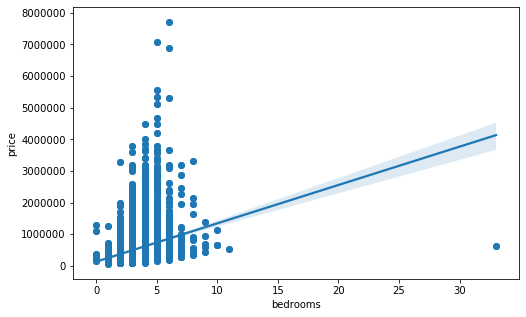

In [38]:
x1 = df1['bedrooms']
y1 = df1['price']
fig, ax = plt.subplots( figsize = (8,5))
ax.scatter(x1, y1)
sns.regplot(x1, y1)
# ax2.hist(x1, y1)

In [66]:
df1.loc[df_train['bedrooms']== 0, 'bedrooms'] = df1['bedrooms'].mean()
df2.loc[df2['bedrooms']== 0, 'bedrooms'] = df2['bedrooms'].mean()
df_1.loc[df1['bedrooms']==0].shape

(0, 21)

In [67]:
df2.loc[df_known['bedrooms']==0].shape

(0, 20)

In [40]:
df1['bedrooms'].describe()

count    17290.000000
mean         3.374810
std          0.935131
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

In [68]:
df2['bedrooms'].describe()

count    4323.000000
mean        3.388798
std         0.903079
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: bedrooms, dtype: float64

In [44]:
df1[df_train['bedrooms']== 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8597,2402100895,20140625T000000,640000.0,33.0,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [46]:
df1[df1['bedrooms']== 3].head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3,9522300010,20150331T000000,1490000.0,3.0,3.5,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,711000.0,3.0,2.5,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050
7,7010701383,20141017T000000,680000.0,3.0,2.5,1800,4400,1.0,0,0,5,7,1350,450,1970,0,98199,47.6599,-122.396,1920,4400
8,291310170,20140804T000000,384500.0,3.0,2.5,1600,2610,2.0,0,0,3,8,1600,0,2005,0,98027,47.5344,-122.068,1445,1288
10,6840701125,20150422T000000,638000.0,3.0,1.0,1830,4400,1.5,0,0,4,8,1720,110,1930,0,98122,47.6052,-122.300,1650,4400


In [51]:
df1.loc[df1['bedrooms']==33, 'bedrooms'] = 3
df1['bedrooms'].max()

11.0

In [59]:
df1.loc[df1['bedrooms'] >= 9]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2356,1773100755,20140821T000000,520000.0,11.0,3.00,3000,4960,2.0,0,0,3,7,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960
3425,424049043,20140811T000000,450000.0,9.0,7.50,4050,6504,2.0,0,0,3,7,4050,0,1996,0,98144,47.5923,-122.301,1448,3866
3680,8812401450,20141229T000000,660000.0,10.0,3.00,2920,3745,2.0,0,0,4,7,1860,1060,1913,0,98105,47.6635,-122.320,1810,3745
8207,8823900290,20150317T000000,1400000.0,9.0,4.00,4620,5508,2.5,0,0,3,11,3870,750,1915,0,98105,47.6684,-122.309,2710,4320
8446,8823901445,20150313T000000,934000.0,9.0,3.00,2820,4480,2.0,0,0,3,7,1880,940,1918,0,98105,47.6654,-122.307,2460,4400
8624,1997200215,20140507T000000,599999.0,9.0,4.50,3830,6988,2.5,0,0,3,7,2450,1380,1938,0,98103,47.6927,-122.338,1460,6291
11181,627300145,20140814T000000,1148000.0,10.0,5.25,4590,10920,1.0,0,2,3,9,2500,2090,2008,0,98004,47.5861,-122.113,2730,10400
14156,2902200015,20150106T000000,700000.0,9.0,3.00,3680,4400,2.0,0,0,3,7,2830,850,1908,0,98102,47.6374,-122.324,1960,2450
17114,5566100170,20141029T000000,650000.0,10.0,2.00,3610,11914,2.0,0,0,4,7,3010,600,1958,0,98006,47.5705,-122.175,2040,11914


### Step 4: Generate new features that you think could be important.

After doing this, you will want to go back to steps 2 and 3 to investigate these new features.

### 4.1) Identify a categorical variable in the data set and create dummy columns.

In [ ]:
# your code here

### 4.2) There is a column that gives the date for when the house was sold, how could this be useful in your model? How might you transform the current column to a more useful feature?

In [ ]:
#your code here

### 4.3) There are columns for when the house was built and when it was renovated.  How could you use these columns to create a new column?

In [ ]:
#your code here 

### <ins>Non-linear transformations</ins>

### 4.4) Create a polynomial feature for two of your continuous variables.

In [ ]:
# your code here

### 4.5) Create an interaction feature between a binary variable (dummy variable) and a continuous variable.

In [ ]:
# your code here

## Step 5: Train-Test Split

If you plan on doing any scaling of your data, make sure it is done at the appropriate time. 

### 5.1) Perform a train-test split of the data.

In [1]:
#your code here 

### 5.2) Fit your scaler to training the data.

In [2]:
#your code here 

### 5.3) Transform the testing set with the scaler.

In [3]:
#your code here 

### 5.4) Fit the model to the training data.

In [4]:
#your code here 

### 5.5) Use the model to predict on the training set and the test set.

In [5]:
#your code here 

### 5.6) Evaluate the training and test predictions using RMSE.

In [6]:
#your code here 

### 5.7) Determine if your model is overfit.

In [ ]:
#your code here 

## Step 6: Utilize some different feature selection techniques before or in conjuction with fitting your models.

### 6.1) Utilize a filter method to identify some features to remove from the model.  

In [7]:
# your code here

### 6.2) After removing the features, re-run Step 5 and see if your new model performs better than the old model.

In [8]:
# your code here

## Step 7: Evaluate your different models in order to determine the best model overall.

## Step 8:  Refit your best model to the entire dataset.

## Step 9: Save your final model using pickle.

https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/